In [1]:
import pandas as pd
import numpy as np

In [19]:
df=pd.read_excel("Pumpkin_Seeds_Dataset.xlsx")

In [20]:
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [4]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [6]:
df.shape

(2500, 13)

In [7]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

<Axes: xlabel='Area'>

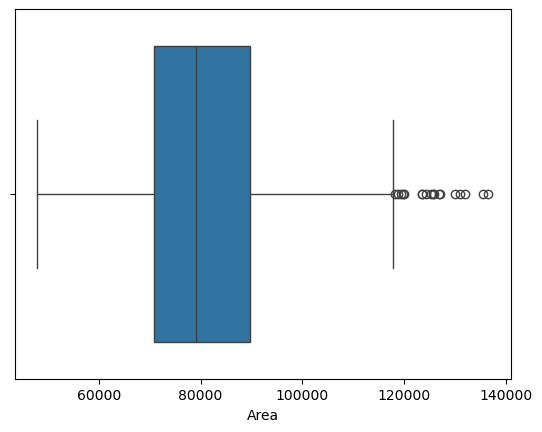

In [8]:
import seaborn as sns

sns.boxplot(x=df['Area'])

In [9]:
# Removing the outliers using IQR method

# Calculate the first and third quartiles
Q1 = df["Area"].quantile(0.25)
Q3 = df["Area"].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df["Area"] >= lower_bound) & (df["Area"] <= upper_bound)]

<Axes: xlabel='Area'>

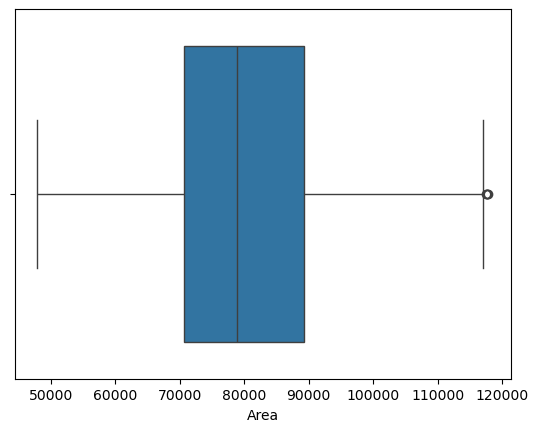

In [10]:
sns.boxplot(x=df['Area'])

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Columns to scale
columns_to_scale = ['Area', 'Perimeter', 'Major_Axis_Length']

# Apply MinMaxScaler only to selected columns
scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the resulting DataFrame
print(df)

          Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0     0.119284   0.033709           0.016192           220.2388        56831   
1     0.410519   0.340661           0.294143           234.2289        77280   
2     0.338866   0.365983           0.351048           211.0457        72663   
3     0.264966   0.210828           0.185370           222.5322        67118   
4     0.259944   0.221228           0.192467           220.4545        67117   
...        ...        ...                ...                ...          ...   
2495  0.453528   0.607791           0.648153           190.4367        80381   
2496  0.310593   0.368254           0.433809           191.8210        70216   
2497  0.573098   0.583228           0.568987           222.1872        88702   
2498  0.458879   0.536535           0.552765           204.7531        80902   
2499  0.529317   0.497268           0.433667           234.5597        85781   

      Equiv_Diameter  Eccentricity  Sol

C:\Users\bhosa\AppData\Local\Temp\ipykernel_1500\3970471553.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [46]:
df.drop(
    columns=['Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Minor_Axis_Length'],
    inplace=True
)


In [47]:
df.head()


,Area,Perimeter,Major_Axis_Length,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,0.9902,0.7453,0.8963,1.4809,0.8207,0
1,76631,1068.146,417.1932,0.9916,0.7151,0.8440,1.7811,0.7487,0
2,71623,1082.987,435.8328,0.9857,0.7400,0.7674,2.0651,0.6929,0
3,66458,992.051,381.5638,0.9902,0.7396,0.8486,1.7146,0.7624,0
4,66107,998.146,383.8883,0.9850,0.6752,0.8338,1.7413,0.7557,0


In [48]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.0000
mean,80658.220800,1130.279015,456.601840,0.989492,0.693205,0.791533,2.041702,0.704121,0.4800
std,13664.510228,109.256418,56.235704,0.003494,0.060914,0.055924,0.315997,0.053067,0.4997
min,47939.000000,868.485000,320.844600,0.918600,0.468000,0.554600,1.148700,0.560800,0.0000
25%,70765.000000,1048.829750,414.957850,0.988300,0.658900,0.751900,1.801050,0.663475,0.0000
50%,79076.000000,1123.672000,449.496600,0.990300,0.713050,0.797750,1.984200,0.707700,0.0000
75%,89757.500000,1203.340500,492.737650,0.991500,0.740225,0.834325,2.262075,0.743500,1.0000
max,136574.000000,1559.450000,661.911300,0.994400,0.829600,0.939600,3.144400,0.904900,1.0000


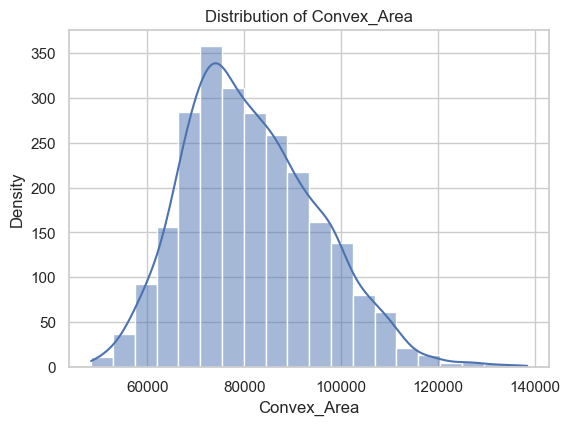

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# List of numeric columns (from df.describe())
numeric_cols = [
    'Convex_Area'
]

# Plot
plt.figure(figsize=(16, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

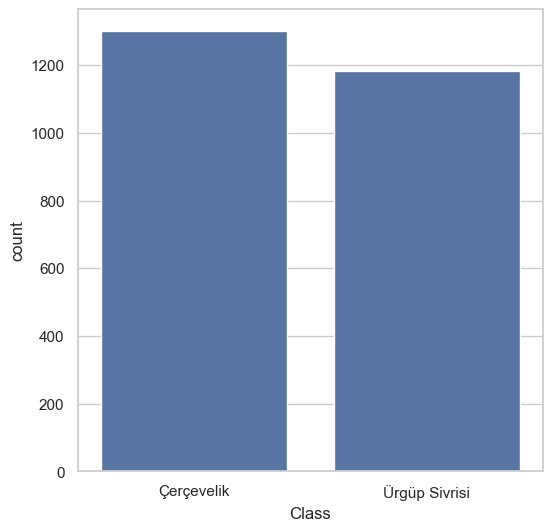

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Class')
plt.show()


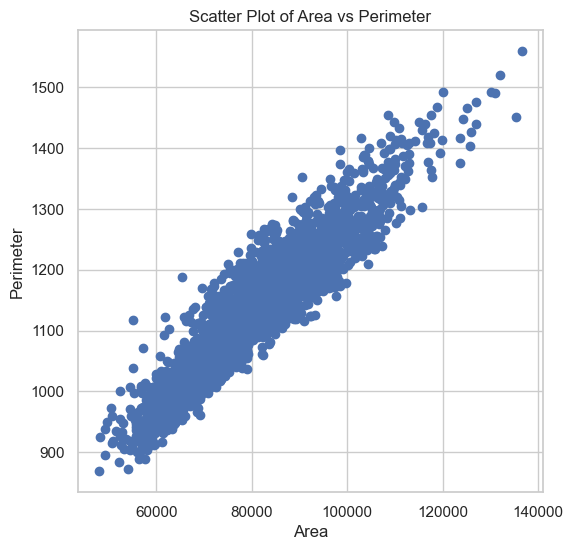

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(df['Area'], df['Perimeter'])
plt.title('Scatter Plot of Area vs Perimeter')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.grid(True)
plt.show()


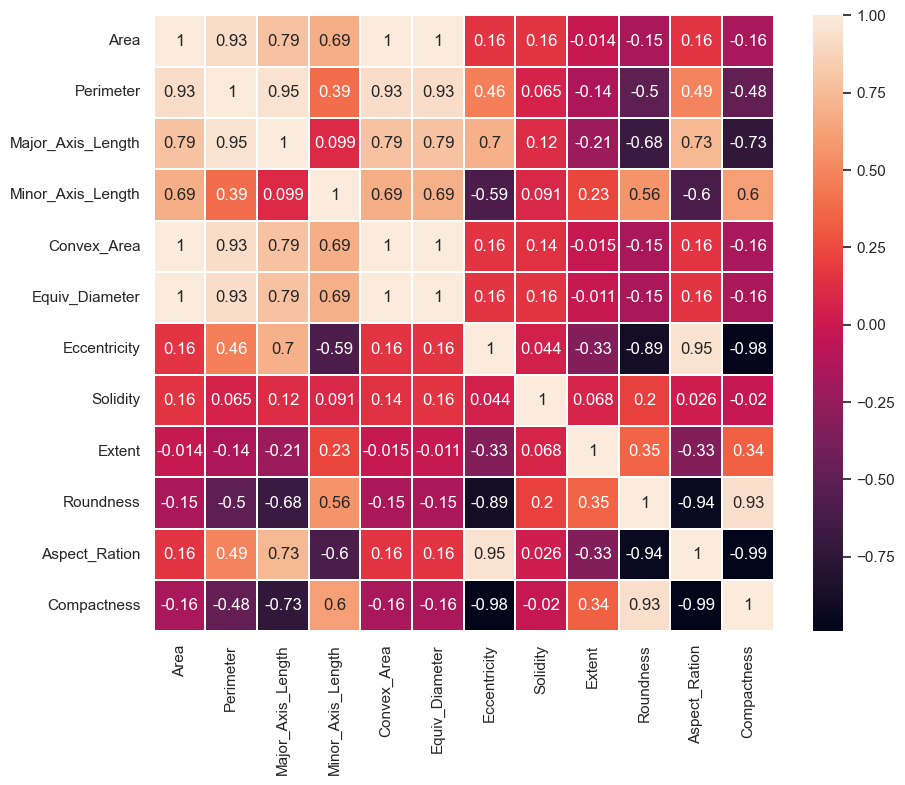

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
df_numeric = df.select_dtypes(include='number')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, linewidths=0.2)
plt.show()

In [27]:
x=df.drop('Class',axis=1)
x

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359


In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])


In [30]:

Y=df['Class']
Y

0       0
1       0
2       0
3       0
4       0
       ..
2495    1
2496    1
2497    1
2498    1
2499    1
Name: Class, Length: 2500, dtype: int64

In [49]:
# Splitting into training and testing dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, Y, test_size=0.2, random_state=30
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 12)
(500, 12)
(2000,)
(500,)


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create and train the model
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

# Make predictions
y_pred = logistic_regression.predict(x_test)

# Evaluate the model
acc_lr = accuracy_score(y_test, y_pred)
c_lr = classification_report(y_test, y_pred)

print("Accuracy Score:", acc_lr)
print(c_lr)

Accuracy Score: 0.866
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       247
           1       0.91      0.81      0.86       253

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



C:\Users\bhosa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the model
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

# Make predictions
y_pred = random_forest.predict(x_test)

# Evaluate the model
acc_rf = accuracy_score(y_test, y_pred)
c_rf = classification_report(y_test, y_pred)

print("Accuracy Score:", acc_rf)
print(c_rf)

Accuracy Score: 0.88
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       247
           1       0.93      0.83      0.88       253

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

# Make predictions
y_pred = decision_tree_model.predict(x_test)

# Evaluate the model
acc_dt = accuracy_score(y_test, y_pred)
c_dt = classification_report(y_test, y_pred)

print("Accuracy Score:", acc_dt)
print(c_dt)

Accuracy Score: 0.816
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       247
           1       0.81      0.83      0.82       253

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Create and train the model
NB = MultinomialNB()
NB.fit(x_train, y_train)

# Make predictions
y_pred = NB.predict(x_test)

# Evaluate the model
acc_nb = accuracy_score(y_test, y_pred)
c_nb = classification_report(y_test, y_pred)

print("Accuracy Score:", acc_nb)
print(c_nb)

Accuracy Score: 0.824
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       247
           1       0.88      0.76      0.81       253

    accuracy                           0.82       500
   macro avg       0.83      0.82      0.82       500
weighted avg       0.83      0.82      0.82       500



In [54]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create and train the model
support_vector = SVC()
support_vector.fit(x_train, y_train)

# Make predictions
y_pred = support_vector.predict(x_test)

# Evaluate the model
acc_svc = accuracy_score(y_test, y_pred)
c_svc = classification_report(y_test, y_pred)

print("Accuracy Score:", acc_svc)
print(c_svc)

Accuracy Score: 0.566
              precision    recall  f1-score   support

           0       0.54      0.89      0.67       247
           1       0.70      0.25      0.36       253

    accuracy                           0.57       500
   macro avg       0.62      0.57      0.52       500
weighted avg       0.62      0.57      0.52       500



In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the model
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)

# Make predictions
y_pred = GBC.predict(x_test)

# Evaluate the model
acc_gbc = accuracy_score(y_test, y_pred)
c_gbc = classification_report(y_test, y_pred)

print("Accuracy Score:", acc_gbc)
print(c_gbc)

Accuracy Score: 0.87
              precision    recall  f1-score   support

           0       0.83      0.92      0.88       247
           1       0.92      0.82      0.86       253

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



In [59]:
prediction = random_forest.predict([[0.410519, 0.340661, 0.294143, 0.9916, 0.7151, 0.8440, 1.7811, 0.7487,0.6235,0.5263,0.25636,0.25522]])


C:\Users\bhosa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [60]:
# Access the predicted class
prediction[0]

# Map prediction to class label
if prediction[0] == 0:
    print("Your seed lies in Çerçevelik class")
elif prediction[0] == 1:
    print("Your seed lies in Ürgüp Sivrisi class")

Your seed lies in Ürgüp Sivrisi class


In [64]:
import pandas as pd

# Create model comparison table
model = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Decision Tree Classifier",
        "RandomForest Classifier",
        "Multinomial Naive Bayes",
        "Support Vector Classifier",
        "Gradient Boost Classifier"
    ],
    "Score": [
        acc_lr,
        acc_dt,
        acc_rf,
        acc_nb,
        acc_svc,
        acc_gbc
    ]
})

# Display the table
model

,Model,Score
0,Linear Regression,0.866
1,Decision Tree Classifier,0.816
2,RandomForest Classifier,0.880
3,Multinomial Naive Bayes,0.824
4,Support Vector Classifier,0.566
5,Gradient Boost Classifier,0.870


In [65]:
import pickle
import warnings
pickle.dump(random_forest,open("model.pkl","wb"))